In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explorative Data Analysis

In [6]:
df = pd.read_csv('./data/bike_buyers_clean.csv')
df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [11]:
# Datatypes and non-nulls. The data is already cleaned so there is no null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [12]:
# Summary for nummerical columns
df.describe()

                 ID         Income     Children         Cars          Age
count   1000.000000    1000.000000  1000.000000  1000.000000  1000.000000
mean   19965.992000   56140.000000     1.908000     1.452000    44.190000
std     5347.333948   31081.609779     1.626094     1.124705    11.353537
min    11000.000000   10000.000000     0.000000     0.000000    25.000000
25%    15290.750000   30000.000000     0.000000     1.000000    35.000000
50%    19744.000000   60000.000000     2.000000     1.000000    43.000000
75%    24470.750000   70000.000000     3.000000     2.000000    52.000000
max    29447.000000  170000.000000     5.000000     4.000000    89.000000


#### Distribution of categorical data

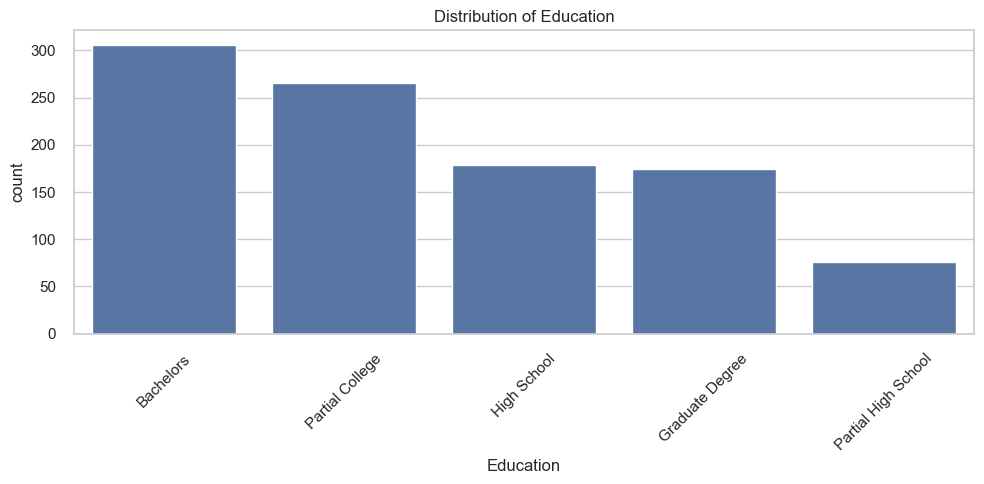

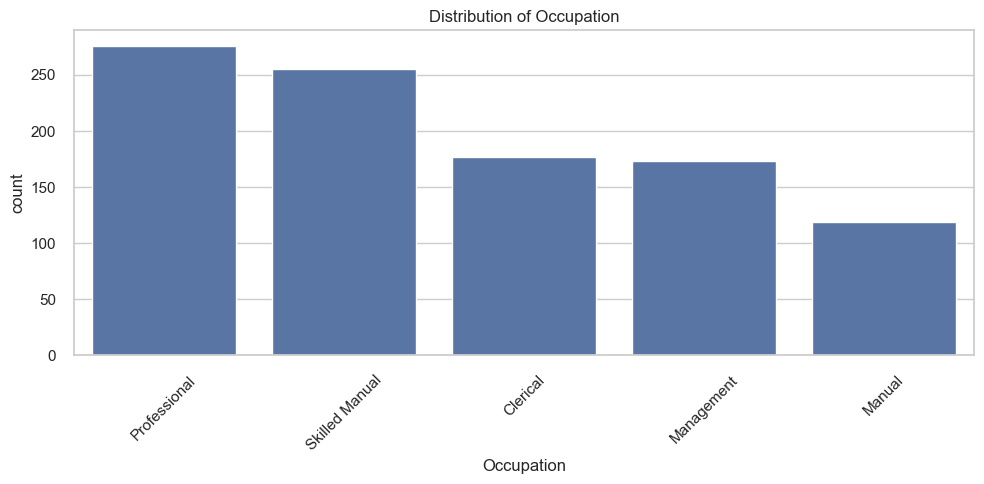

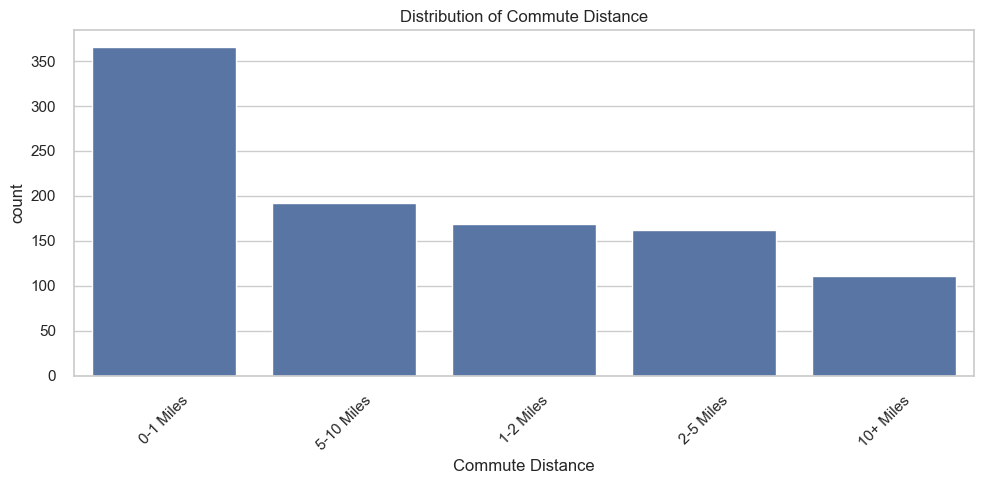

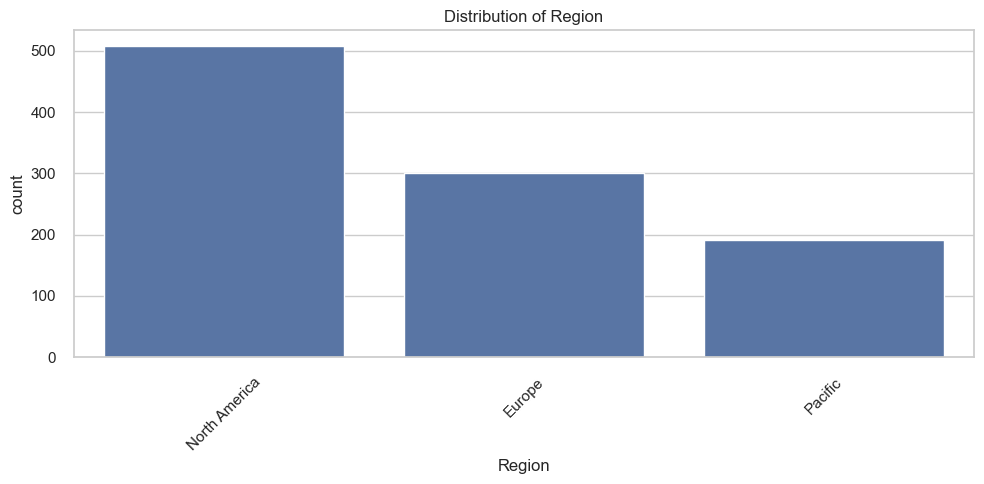

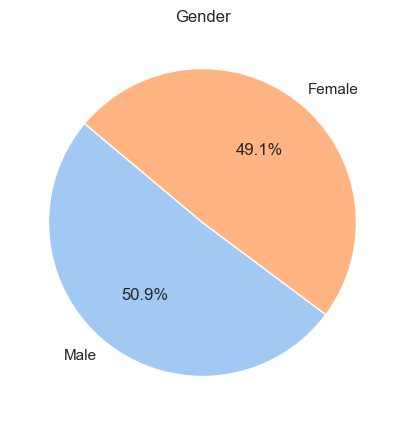

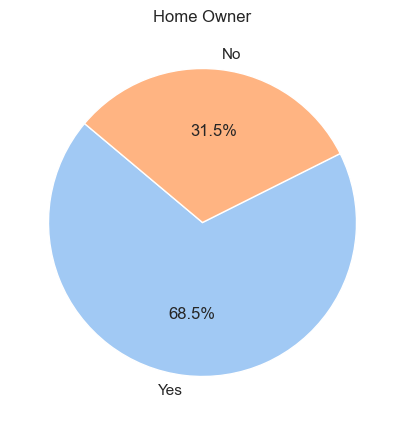

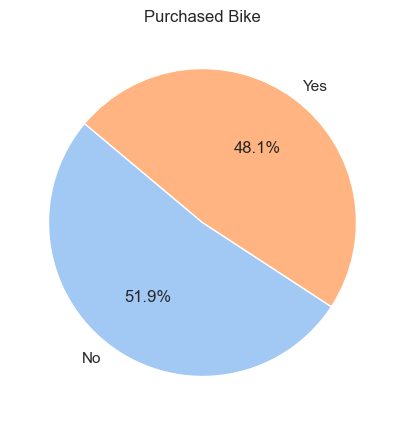

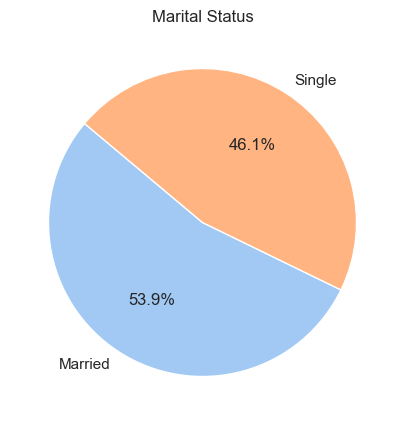

In [18]:
# Distribution of categorical data. Each column plotted
sns.set(style="whitegrid")

# List of categorical columns
more_than_two_cats = [ 'Education', 'Occupation',  'Commute Distance', 'Region']

# Plotting each categorical column
for col in more_than_two_cats:
    plt.figure(figsize=(10, 5))  # Adjust the size of the figure
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)  # Ordering bars by count
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)  # Rotate x labels for better visibility if needed
    plt.tight_layout()  # Adjust subplot params for better layout
    plt.show()

few_categories_cols = ['Gender', 'Home Owner', 'Purchased Bike', 'Marital Status']

for col in few_categories_cols:
    # Data to plot
    sizes = df[col].value_counts().values
    labels = df[col].value_counts().index
    
    # Pie Chart is more suitable option for visulisiation if there is less then two options in column
    plt.figure(figsize=(8, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title(f'{col}')
    plt.show()

#### Distribution of numerical data

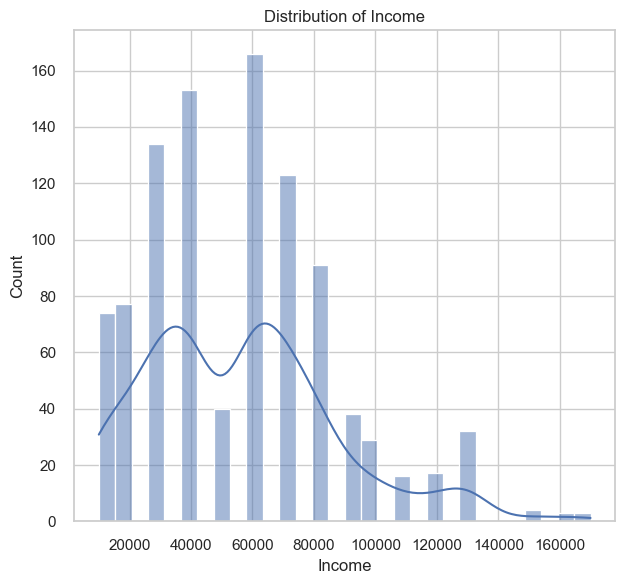

Income - Skewness: 0.75, Kurtosis: 0.513


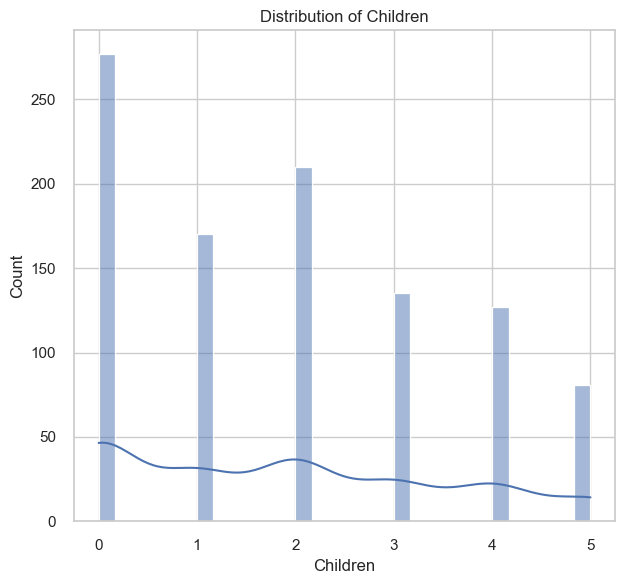

Children - Skewness: 0.392, Kurtosis: -1.019


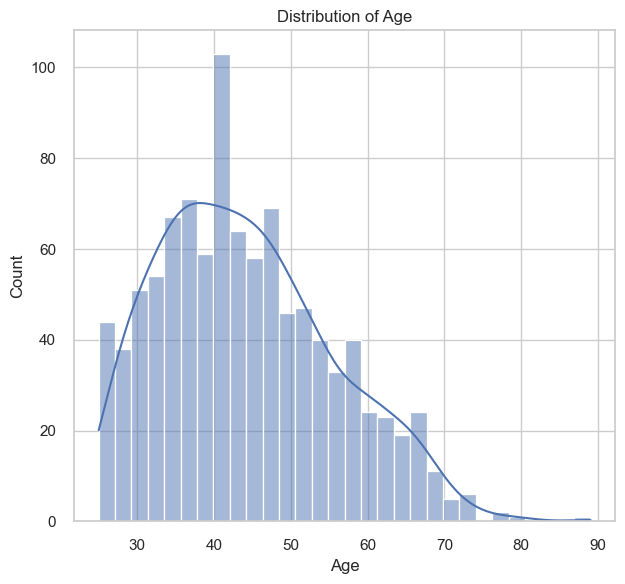

Age - Skewness: 0.524, Kurtosis: -0.265


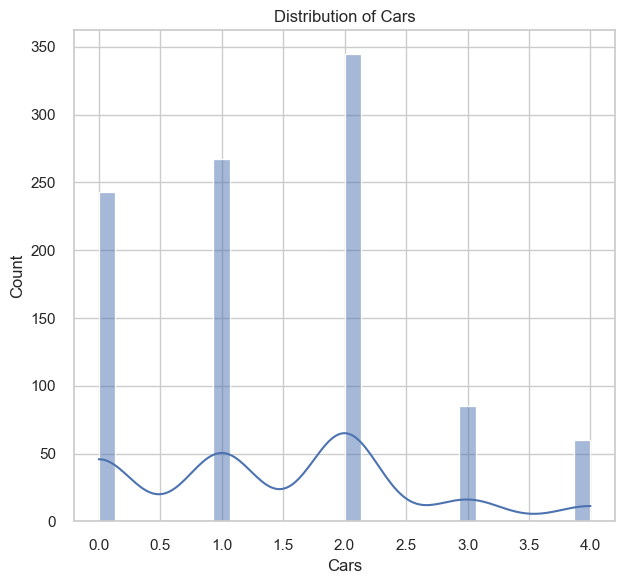

Cars - Skewness: 0.42, Kurtosis: -0.404


In [29]:
numerical_columns = ['Income', 'Children', 'Age', 'Cars']
for col in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    plt.tight_layout()
    plt.show()

    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()
    print(f"{col} - Skewness: {round(skewness,3)}, Kurtosis: {round(kurtosis,3)}")

How can we interpret this results? 

First lets recall general rules for skewness and kurtosis:

For skewness:
- A value close to 0 indicates near symmetry.
- A positive value indicates right-skewed data.
- A negative value indicates left-skewed data. 

For kurtosis:
- A value close to 0 indicates a shape similar to the normal distribution (mesokurtic).
- A positive value indicates a leptokurtic distribution (sharper peak and fatter tails).
- A negative value indicates a platykurtic distribution (flatter peak and thinner tails).

1. Income
    - Skewness 0.75 indicates that the data is skewed to the right. This suggests that there is a tail of higher incomes on the right, that are pulling the mean to the right side.
    - Positive kurtosis with a value of 0.513 indicates that that this distribution has heavier tails and a sharper peak compared to a normal distribution. It suggests a higher occurrence of extreme values. 

2. Children
    - Slight positive skewness. While the data is skewed to the right, it's not as strongly skewed as Income. This suggests there might be a few families with more children pulling the mean above the median, but not dramatically so.
    - The negative kurtosis value indicates that the distribution has a flatter peak and lighter tails than a normal distribution. This suggests that values are moderately spread out.

3. Age
    - The positive value suggests a right skew, but again, it's not a very strong skew. There might be a few older individuals pulling the mean age slightly above the median.
    - The distribution is a bit flatter than a normal distribution and might have lighter tails.

4. Cars
    - Slight positive skewness. The data has a longer tail on the right side, indicating a few individuals own more cars than the average.
    - The distribution has lighter tails, and values are spread out more evenly.


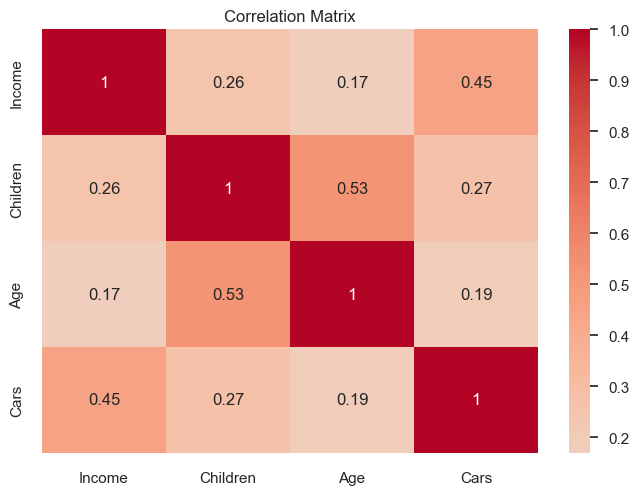

In [32]:
# Correlation of nummrical variables in dataset
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()